### IE 7275 - Assignment 1 - Data Visualization and understanding data

In [319]:
from datetime import date
studentName="Qi Li"
studentEmail="li.qi8@northeastern.edu"
homework=1
contributedPercentage=100
print("IE 7275: Data mining in Engineering")
print("\n"*15)
print(f'Homework -{homework}')
print(f'Student name: {studentName}')
print(f'Student Email: {studentEmail}')
print("\n"*15)
print(f'Percentage of Effort Contributed by Student : {contributedPercentage}%')
print(f'Submission Date: {date.today()}')

IE 7275: Data mining in Engineering
















Homework -1
Student name: Qi Li
Student Email: li.qi8@northeastern.edu
















Percentage of Effort Contributed by Student : 100%
Submission Date: 2023-01-31


Through this homework, you will learn to import the local excel sheet to Colab, input data, and export the updated data frame.

Please run the code chunks one by one, and enter the code along with your comments in the **TODO** part of this notebook.

Write down your findings or comments in a sentence or two for each questions

In [320]:
# We will rely heavily on the following packages for data processing
# After "import .. as ..", "pd" and "np" will represent the package "pandas" and "numpy" respectively
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

To learn more about pandas and numpy, please refer to the following links:

Pandas: https://pandas.pydata.org/docs/getting_started/index.html#intro-to-pandas

Numpy: https://numpy.org/devdocs/user/absolute_beginners.html

Use page search to navigate to the functions you require.


# Data Import

In [321]:
#TO-DO
#Open the titanic.csv file
df_titanic = pd.read_csv(r'/Users/liqi/Desktop/IE7275/作业/hw1/titanic.csv')
df_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


# Data Analysis

In [384]:
#TO-DO
#show the distribution for the column pclass in table
df_titanic["pclass"].value_counts().to_frame()

,pclass
3,709
1,323
2,277


[Text(0.5, 1.0, 'distribution in plcass')]

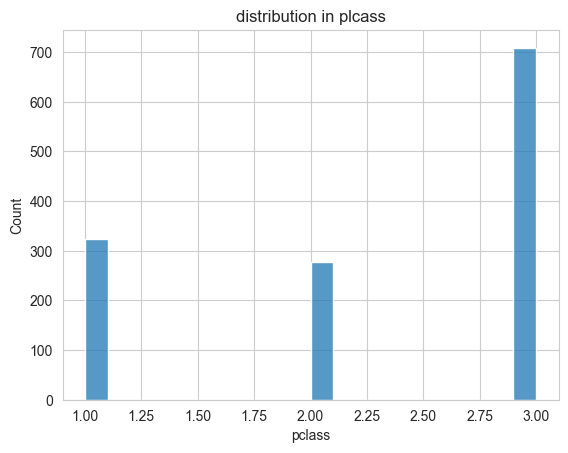

In [396]:
#TO-DO
#show the distribution for the column pclass in plots
sns.set_style('whitegrid')
# use histplot to show the distribution
sns.histplot(df_titanic['pclass'], kde = False, bins = 20).set(title = 'distribution in plcass')

,status,ratio
0,death,0.618029
1,survive,0.381971


<AxesSubplot: title={'center': 'percentage of passenger survived'}, xlabel='status'>

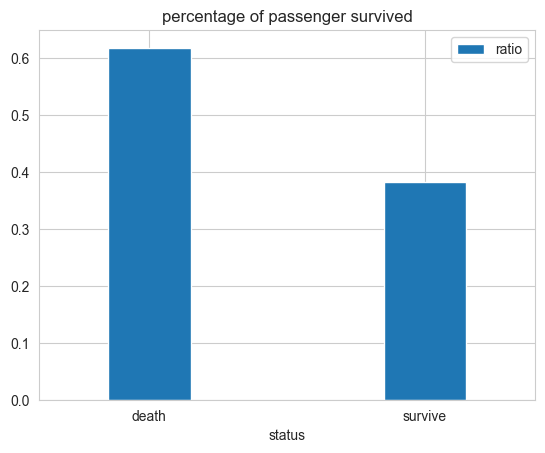

In [387]:
#TO-DO
#What is % of the passengers survived, show the results in table and plot
survivor_count = df_titanic['survived'].sum()
total_passenger_count = len(df_titanic)
survive_ratio = survivor_count / total_passenger_count
death_ratio = 1 - survive_ratio
#show the result in table
data = {'status':['death', 'survive'], 'ratio':[death_ratio, survive_ratio]}
df_survive = pd.DataFrame(data = data)
display(df_survive)
#show the result in plot
df_survive.plot(x = 'status', kind = 'bar', title = 'percentage of passenger survived', width = 0.3, rot=360)

<AxesSubplot: title={'center': 'gender distribution'}>

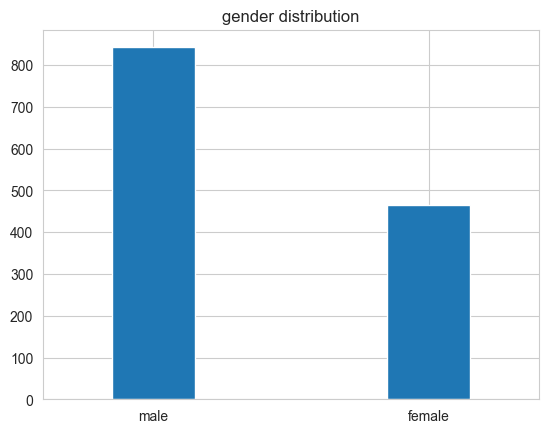

In [405]:
#TO-DO
# Show the gender level distribution in table and plot
df1 = df_titanic['sex'].value_counts()
df1.plot(kind = 'bar', title = 'gender distribution', width = 0.3, rot=360)

0    682
1    161
Name: survived, dtype: int64

<AxesSubplot: title={'center': 'male survival'}>

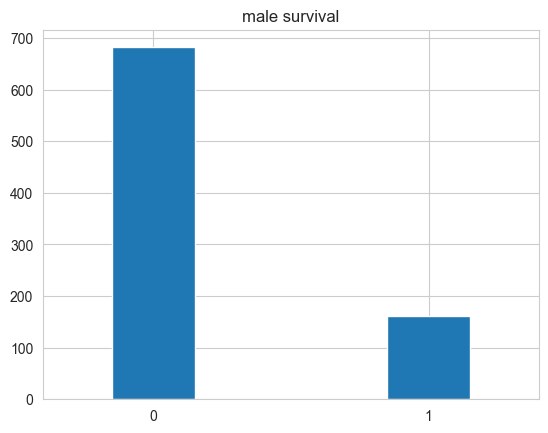

In [369]:
#TO-DO
# Show the gender level suvival distribution in table and plot
df_male = df_titanic[df_titanic['sex']== 'male']['survived'].value_counts()
display(df_male)
df_male.plot(x = 'status', kind = 'bar', title = 'male survival', width = 0.3, rot=360)

1    339
0    127
Name: survived, dtype: int64

<AxesSubplot: title={'center': 'female survival'}>

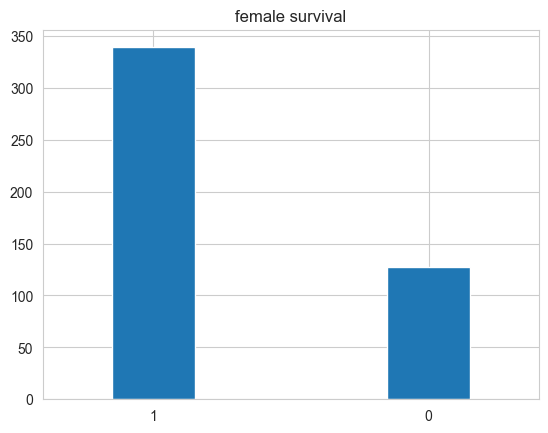

In [192]:
df_female = df_titanic[df_titanic['sex']== 'female']['survived'].value_counts()
display(df_female)
df_female.plot(kind = 'bar', title = 'female survival', width = 0.3, rot=360)

,index,age,survived
0,0,"(18.0, 65.0]",1
1,1,"(0.0, 18.0]",1
2,2,"(0.0, 18.0]",0
3,3,"(18.0, 65.0]",0
4,4,"(18.0, 65.0]",0
...,...,...,...
1304,1304,"(0.0, 18.0]",0
1305,1305,NaN,0
1306,1306,"(18.0, 65.0]",0
1307,1307,"(18.0, 65.0]",0


,age,survived,index
0,"(0, 18]",0,98
1,"(0, 18]",1,95
2,"(18, 65]",0,513
3,"(18, 65]",1,330
4,"(65, 100]",0,8
5,"(65, 100]",1,2


<AxesSubplot: xlabel='survived', ylabel='index'>

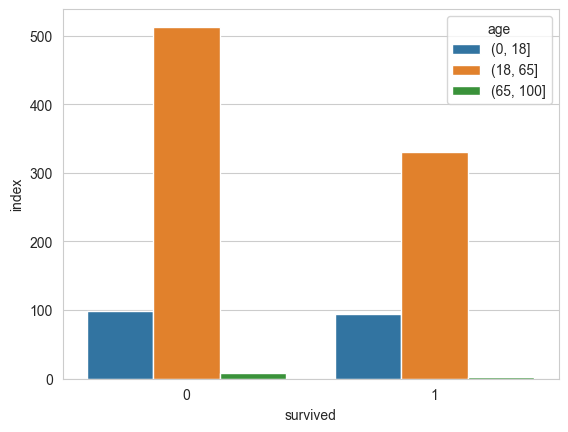

In [476]:
#TO-DO
# Show the age level suvival distribution in table and plot
# Hint - Make a custom age group
df_catage = pd.cut(df_titanic['age'],[0,18,65,100]).reset_index()
df_catage['survived'] = df_titanic['survived']
display(df_catage)
# df1 = pd.DataFrame(data=df_catage.value_counts()).rename(columns = {'age':'number'}).reset_index()
df1 = df_catage.groupby(['age', 'survived']).count().reset_index()
display(df1)
sns.barplot(df1, x = 'survived', y = 'index', hue = 'age')

In [474]:
#TO-DO
# What is the total fare price?
# What is the average fare price per adult, child and senior citizen group?
total_fare_price = df_titanic['fare'].sum()
print(total_fare_price)

df_fare = df_catage
df_fare['fare'] = df_titanic['fare']
df_fare.groupby(['age'])['fare'].mean().reset_index()

43550.4869


,age,fare
0,"(0, 18]",31.910968
1,"(18, 65]",37.595991
2,"(65, 100]",52.231260


In [350]:
#TO-DO
# What are the columns are having null and empty values?
df_null = df_titanic.isnull().sum()
df_null

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [422]:
#TO-DO
# How many passengers travelled with sibilings?
display(df_titanic['sibsp'].value_counts(ascending = False))
sibsp_num = 1309 - 891
sibsp_num

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

In [281]:
#TO-DO
# Rank the number of the passengers by Port of Embarkation

# Titanic passengers embarked form three different ports: Cherbourg (C),Queenstown (Q),Southampton (S)
cherbourg_count = (df_titanic['embarked'] == 'C').sum()
queenstown_count = (df_titanic['embarked'] == 'Q').sum()
southampton_count = (df_titanic['embarked'] == 'S').sum()
df = pd.DataFrame({
    'Port': ['Cherbourg', 'Queenstown', 'Southampton'],
    'Passenger Number': [cherbourg_count, queenstown_count, southampton_count]
})
df.sort_values(by=['Passenger Number'],ascending=False)


,Port,Passenger Number
2,Southampton,914
0,Cherbourg,270
1,Queenstown,123


In [426]:
#TO-DO
# Show the top 3 states by the number of the passengers
df1 = df_titanic['home.dest'].str.split('/',expand=True)
df2 = df1[0].str.split(',',expand=True)
df2[1].value_counts()[:3]

 NY         116
 England     30
 MA          27
Name: 1, dtype: int64

Text(0.5, 1.0, 'Survival Probability by Parch')

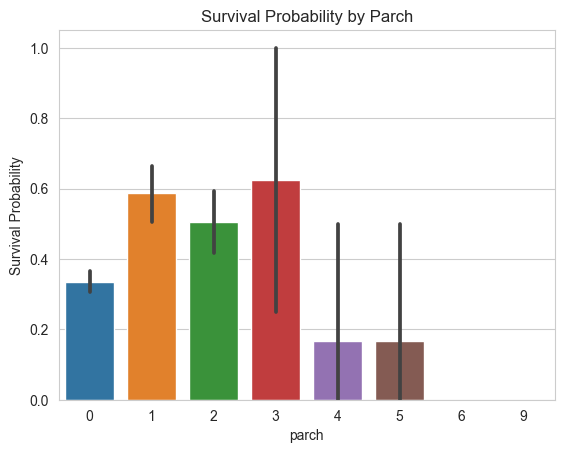

In [309]:
#TO-DO
# Perform novel suvival analysis using pandas queries and provide your findings
# The survival rate may have relation to parch, which refer to the parent and children on boarch with the passengers.
df_titanic['parch'].value_counts(ascending=False)
# Mean of survival by Parch
df_titanic[['parch', 'survived']].groupby('parch', as_index = False).mean().sort_values(by = 'survived', ascending = False)
# Plot
sns.barplot(x = 'parch', y ='survived', data = df_titanic)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')
# Analysis: The plot shows that passengers with parents and children in numbers of 1, 2, and 3 are more likely to 
# survive in this disaster. 

In [ ]:
#TO-DO
# What are the columns do you consider for further analysis or modeling?
# First of all, in terms of survival, I may consider the fitness of the passenger. For example, if passengers have 
# some diseases like heart disease, it will prevent them from running after the collision. Also, the fitness relates
# to if they can wait in the cold water for hours to wait for the rescue.

### Import the housing dataset

In [56]:
#TO-DO
#Open housing dataset
df_housing = pd.read_csv(r'/Users/liqi/Desktop/IE7275/作业/hw1/housing.csv')
df_housing.columns = ['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df_housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [433]:
#TO-DO
#Show the datatypes, null and missing values

#Show the datatypes
df_housing.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [432]:
#show the null and missing values
df_housing.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64

In [435]:
#TO-DO
# Change the columns CHAS, RAD to category
df_housing['CHAS'] = df_housing['CHAS'].astype("category")
df_housing['CHAS']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
500    0.0
501    0.0
502    0.0
503    0.0
504    0.0
Name: CHAS, Length: 505, dtype: category
Categories (16, float64): [0.000, 0.580, 0.584, 0.597, ..., 0.713, 0.718, 0.740, 1.000]

In [51]:
df_housing['RAD'] = df_housing['RAD'].astype("category")
df_housing['RAD']

0      2
1      2
2      3
3      3
4      3
      ..
500    1
501    1
502    1
503    1
504    1
Name: RAD, Length: 505, dtype: category
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 24, 666]

<AxesSubplot: >

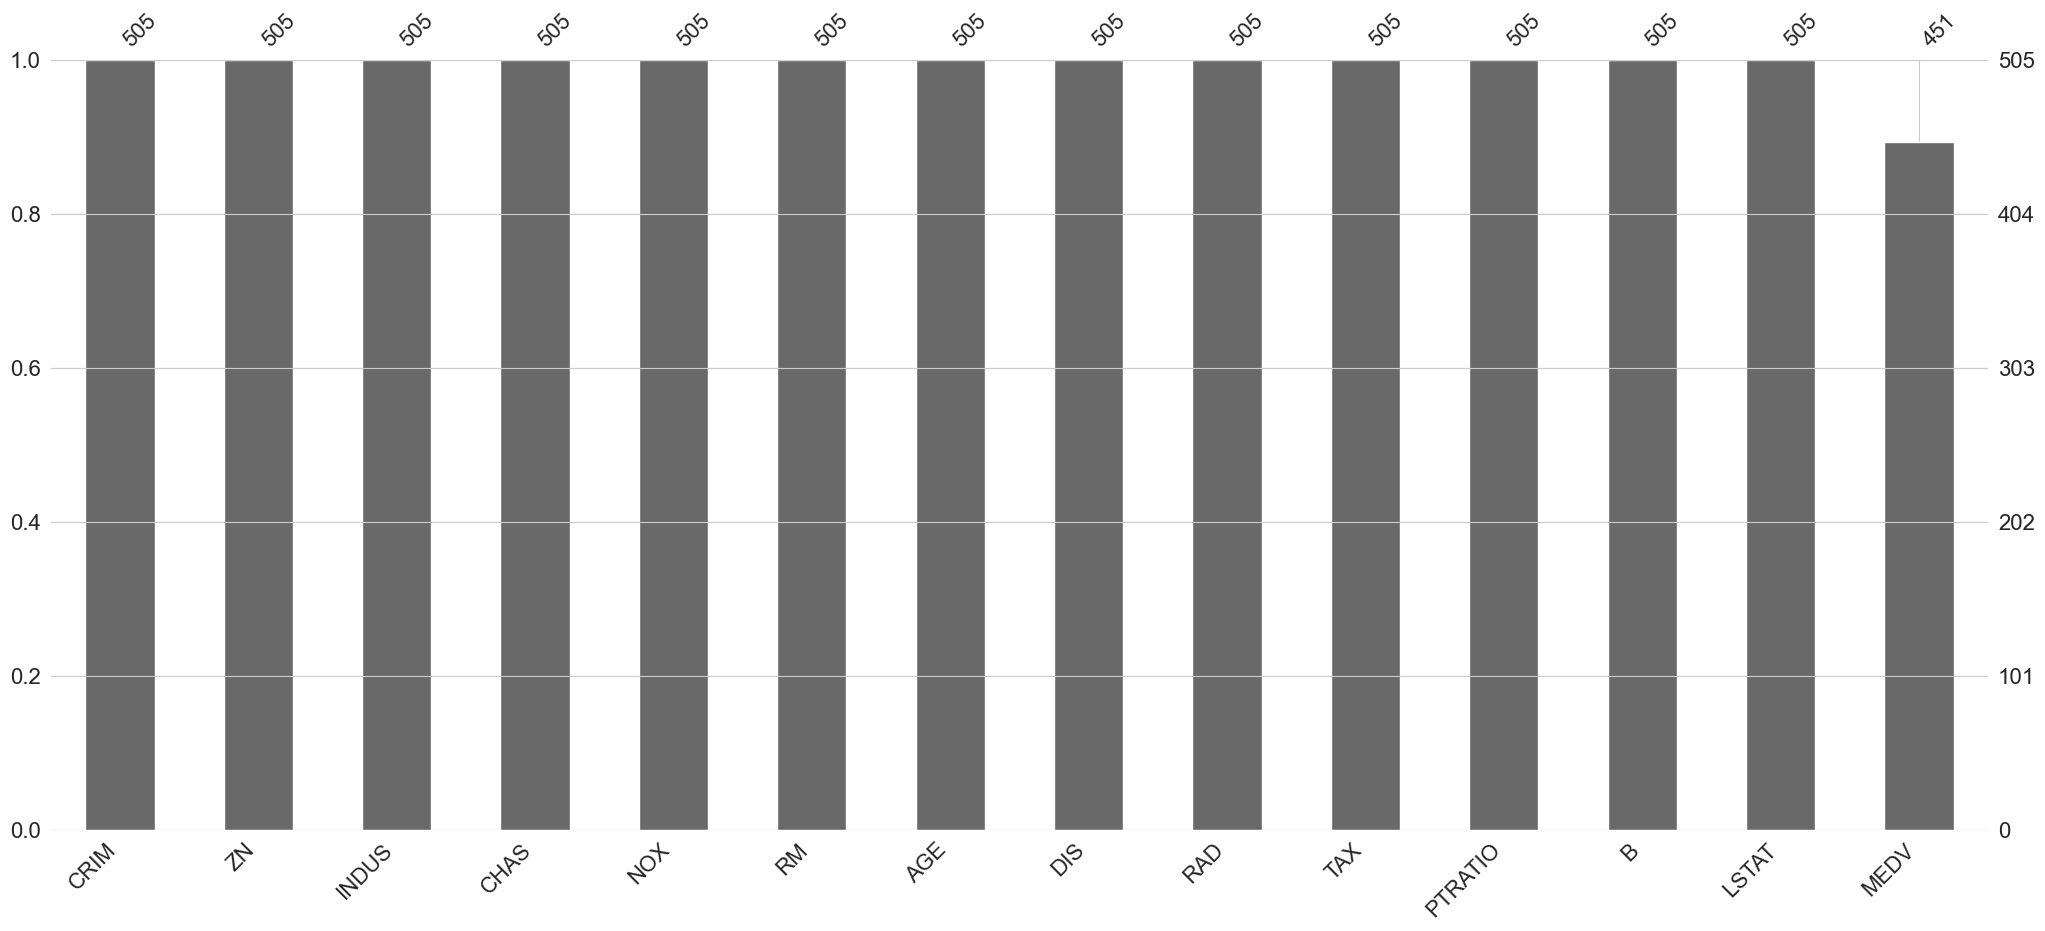

In [19]:
#TO-DO
#Plot the missing values
import missingno as msno
msno.bar(df_housing)

In [26]:
#TO-DO
#Show CHAS feature distribution table
df1 = df_housing['CHAS'].value_counts().reset_index().sort_values('index').reset_index(drop=True)
df1.columns = ['CHAS', 'Frequency']
df1

,CHAS,Frequency
0,0.000,416
1,0.580,2
2,0.584,2
3,0.597,5
4,0.614,4
5,0.631,1
6,0.659,2
7,0.668,2
8,0.671,6
9,0.679,6


<AxesSubplot: >

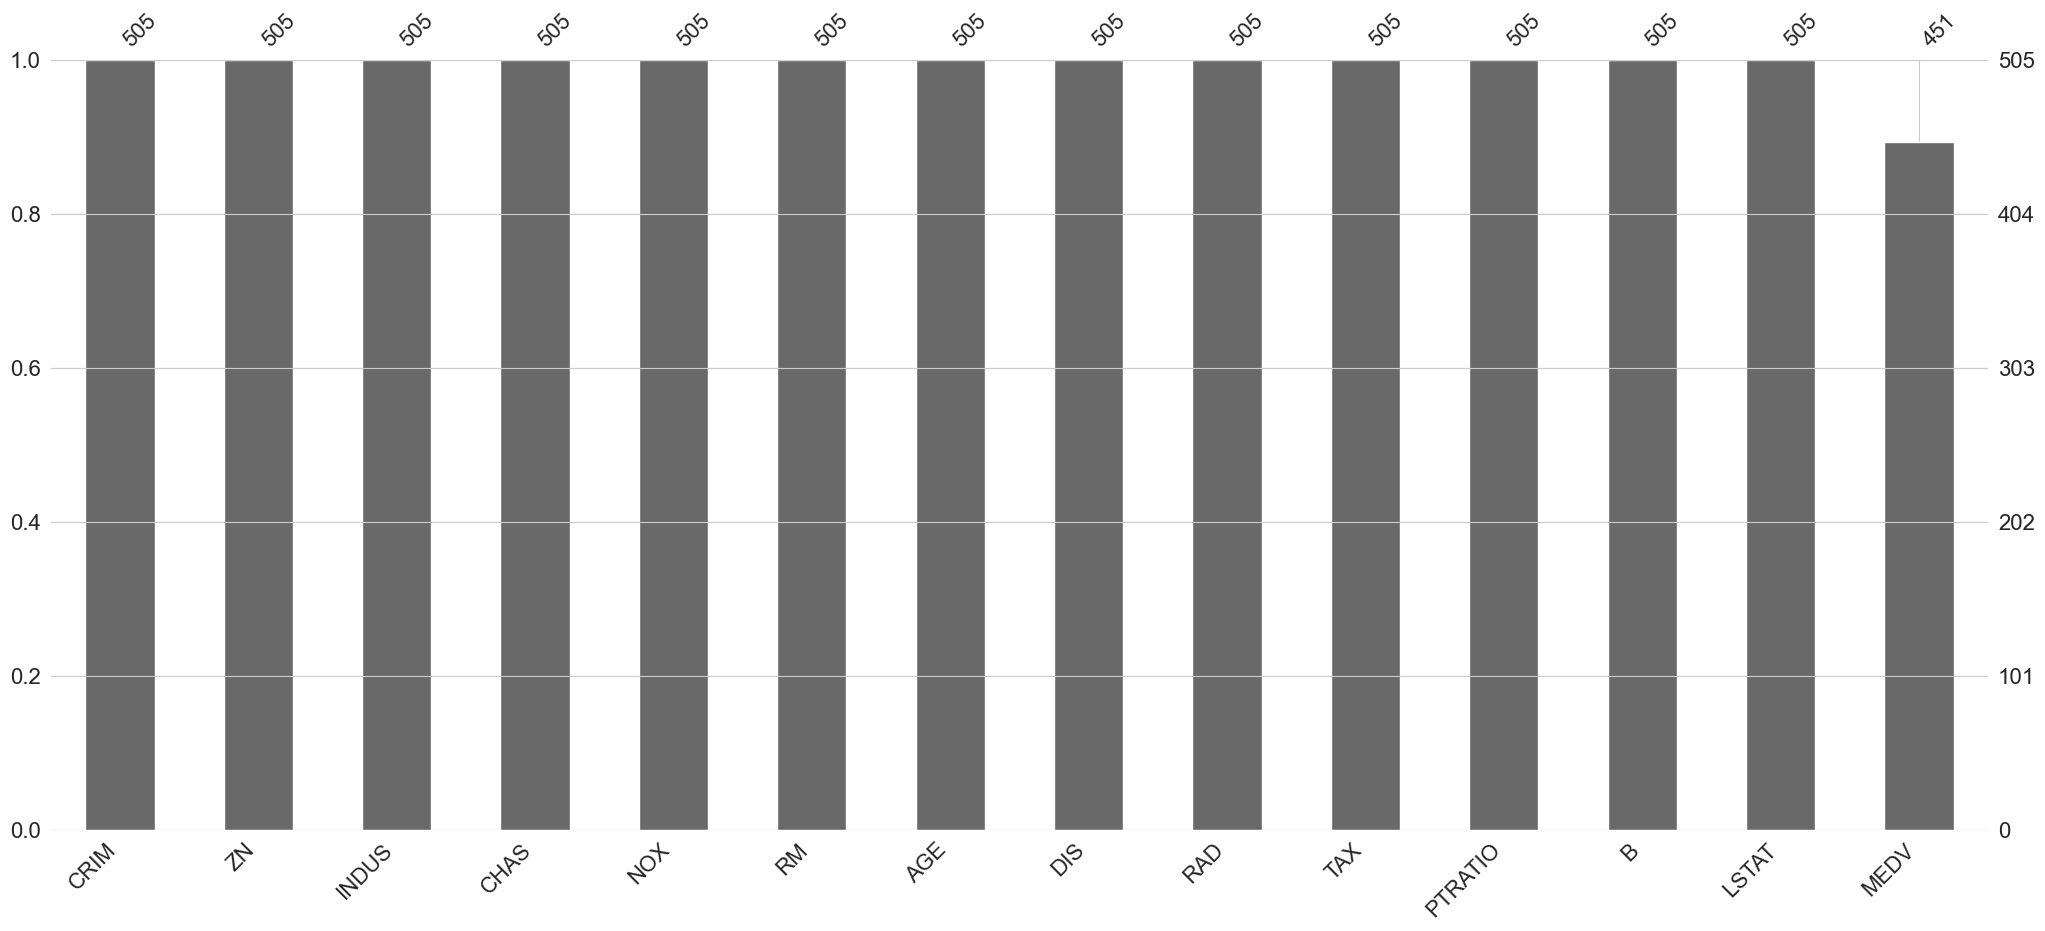

In [30]:
#TO-DO
#Plot the missing values and plots
msno.bar(df_housing)

In [437]:
#TO-DO
#Show the median values for each RAD
display(df_housing.groupby('RAD').median())

/var/folders/8d/mvyw1th16qv_y3s_s33b1l340000gn/T/ipykernel_61246/1319915728.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(df_housing.groupby('RAD').median())


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
RAD,,,,,,,,,,,,
1,0.034660,40.0,2.97,0.4290,6.5400,32.00000,6.64070,284.0,16.900,394.020,7.830,22.00
2,0.062600,0.0,3.41,0.4690,6.4190,67.85000,3.49520,270.0,17.900,392.515,7.815,23.85
3,0.068965,0.0,4.39,0.4490,6.3145,52.05000,5.25075,233.0,17.900,394.545,7.645,26.50
4,0.212325,0.0,9.02,0.4890,6.0645,60.45000,4.20400,306.0,18.950,393.540,10.920,20.45
5,0.170040,0.0,7.87,0.5200,6.2730,79.20000,2.91530,358.0,15.200,391.130,9.680,23.00
6,0.136945,0.0,9.69,0.5470,6.0595,65.25000,2.75330,391.0,17.800,394.565,12.220,21.20
7,0.140300,22.0,5.86,0.4310,6.5900,40.40000,7.39670,330.0,19.100,390.430,7.530,26.20
8,0.394925,0.0,6.20,0.5040,6.7440,72.45000,3.65190,307.0,17.400,386.645,7.230,28.25
24,6.080060,0.0,18.10,0.7000,6.2175,90.85000,2.23380,666.0,20.200,376.920,16.430,17.15


In [447]:
#TO-DO
#Find the outliers for all the numeric columns
#Create a function to find outliers using IQR

df_numeric = df_housing.select_dtypes('float64')
def find_outliers_IQR(df_housing):
   q1 = df_housing.quantile(0.25)
   q3 = df_housing.quantile(0.75)
   IQR = q3-q1
   outliers = df_housing[((df_housing<(q1-1.5*IQR)) | (df_housing>(q3+1.5*IQR)))]
   return outliers

In [448]:
outliers = find_outliers_IQR(df_numeric)
outliers.notnull().sum()

CRIM        96
ZN          45
INDUS        0
NOX         54
RM          58
AGE          0
DIS         54
TAX        137
PTRATIO     50
B           90
LSTAT       14
MEDV        33
dtype: int64

In [449]:
df_housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
